# Checkpoint 5

## Part A - Explore Data 

In [1]:
#Import Libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
#Reading File
data_frame = pd.read_csv(r'C:\Users\stesa\Desktop\GoMyCode\Titanic_Survived.csv')

#Display data
data_frame.head()

,Survived,Pclass,SibSp,Parch,Fare,Title,FamilySize,C,Q,S,female,male,Age
0,0,2,0,0,13.0000,0,1,0,0,1,0,1,0.346569
1,0,3,0,0,7.6500,0,1,0,0,1,0,1,0.308872
2,0,3,0,0,7.8542,0,1,0,0,1,0,1,0.246042
3,0,3,0,4,21.0750,0,5,0,0,1,1,0,0.359135
4,0,1,1,0,52.0000,0,2,0,0,1,0,1,0.384267


In [3]:
#Data Length
data_frame.shape

(889, 13)

In [4]:
#output counts
data_frame['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

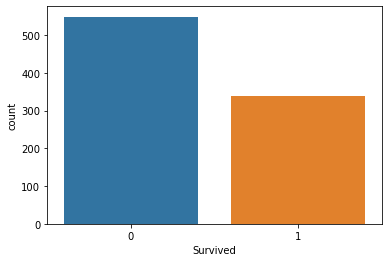

In [5]:
#Plot 'Survived'
sns.countplot(x =data_frame.Survived,order=data_frame['Survived'].value_counts().index)
plt.show()

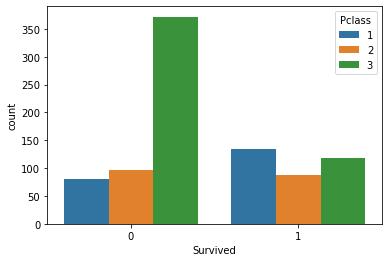

In [6]:
#Plot 'Survived' with 'Pclass'
sns.countplot(x='Survived', hue='Pclass', data=data_frame)
plt.show()

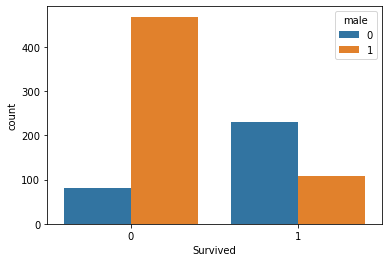

In [7]:
#Plot 'Survived' with 'male'
sns.countplot(x='Survived', hue='male', data=data_frame)
plt.show()

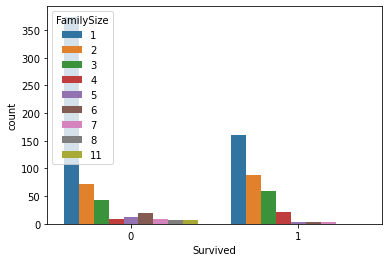

In [8]:
#Plot 'Survived' with 'FamilySize'
sns.countplot(x='Survived', hue='FamilySize', data=data_frame)
plt.show()

## Part B - Supervised Machine Learning

### 1 - Logistic Regression

## Solution 1

#####      A- Splitting dataset into a training set and a testing set

In [9]:
#features extraction

x = data_frame.drop('Survived' , axis=1)
y = data_frame['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20) 


#####      B- Feature Scalling

In [10]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

#####      C- Build Model

In [11]:
model = LogisticRegression(solver='newton-cg') #build Logistic regression model
model.fit(x_train,y_train) #fitting the training data
pred=model.predict(x_test) #testing our model’s performance
y_pred_logistic = model.decision_function(x_test)

print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       137
           1       0.77      0.70      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



#####      D- Confusion Matrix

Predicted    0   1
Actual            
0          119  18
1           26  60


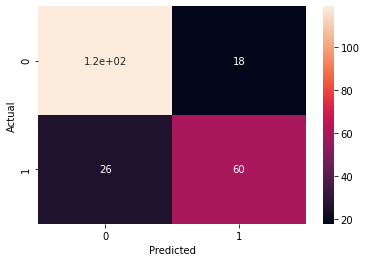

In [12]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)
plt.show()


## ROC / AUC

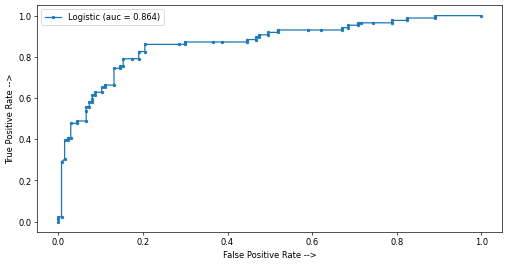

Default Area Under Cuve : Threshold = 0.5
Auc for our data is 0.783
Auc after using ROC_Curve is 0.864


In [13]:
from sklearn.metrics import roc_curve, auc, roc_auc_score 

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)

plt.figure(figsize=(10,5), dpi=60)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()
auc = np.round(roc_auc_score(y_test, pred), 3) 
print('Default Area Under Cuve : Threshold = 0.5')
print("Auc for our data is {}". format(auc))
print('Auc after using ROC_Curve is 0.864')

## Solution 2

#####      A- Splitting dataset into a training set and a testing set

In [14]:
#features extraction

features = ['Pclass','Fare','FamilySize','C','Q','S','female','male','Age']
x = data_frame[features]
y = data_frame['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20) 


#####      B- Feature Scalling

In [15]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)


#####     C- Build Model

In [16]:
model = LogisticRegression(solver='newton-cg') #build Logistic regression model
model.fit(x_train,y_train) #fitting the training data
pred=model.predict(x_test) #testing our model’s performance
y_pred_logistic = model.decision_function(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       137
           1       0.77      0.72      0.74        86

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



#####      D- Confusion Matrix

Predicted    0   1
Actual            
0          118  19
1           24  62


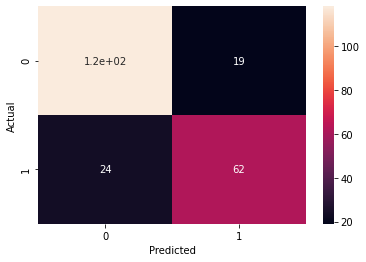

In [17]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)
plt.show()


## ROC / AUC

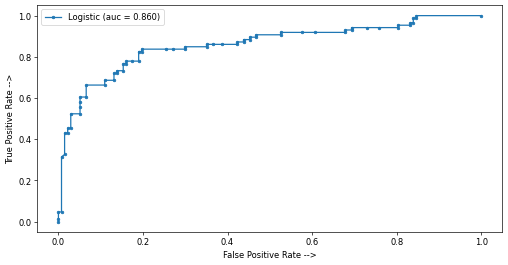

Default Area Under Cuve : Threshold = 0.5
Auc For our Data is 0.791
Auc after using ROC_Curve is 0.860


In [18]:
from sklearn.metrics import roc_curve, auc, roc_auc_score 

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)

plt.figure(figsize=(10, 5), dpi=60)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

auc = np.round(roc_auc_score(y_test, pred), 3) 
print('Default Area Under Cuve : Threshold = 0.5')
print('Auc For our Data is {}'. format(auc))
print('Auc after using ROC_Curve is 0.860')

### ROC_AUC Definition

In [19]:
## Receiver Operating Characteristics (ROC) :

#Curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR).
#Classifiers that give curves closer to the top-left corner indicate a better performance.
#The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

## The Area Under the Curve (AUC)

#Auc is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve
#An excellent model has AUC near to the 1 which means it has a good measure of separability. 
#A poor model has AUC near to the 0 which means it has the worst measure of separability